# Importamos todas las lisbrerias y claves

In [21]:
from iol_user_ullua import *

iol_user = USER
iol_password = PASS

In [22]:
import datetime, requests, time
import pandas as pd
import numpy as np
from IPython.display import clear_output
import pickle

In [23]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Entrenar Machine Learning

## Bajamos data historica

In [25]:
def downloadTiingo(symbol, _from, _to, interval='1min'):
    clear_output(wait=True)
    TOKEN = '3e63d74be68b49e14fb4c161c378b6250ad8d5c3'
    url = f'https://api.tiingo.com/iex/{symbol}/prices'
    headers = {'Content-Type': 'application/json'}
    params = {'startDate':_from, 'endDate':_to, 'resampleFreq':interval, 'token':TOKEN }
    r = requests.get(url, params=params, headers=headers)
    df = pd.DataFrame(r.json()).set_index('date')
    print('Datos recabados ok hasta el: ', _to)
    return df

In [27]:
desde = datetime.date(2017,1,1)
hasta = datetime.date(2021,7,14)

downloadTiingo('GGAL', desde, hasta, interval='1min')

Datos recabados ok hasta el:  2021-07-14


,close,high,low,open
date,,,,
2021-06-09T16:15:00.000Z,10.220,10.210,10.210,10.210
2021-06-09T16:16:00.000Z,10.230,10.230,10.215,10.215
2021-06-09T16:17:00.000Z,10.280,10.280,10.280,10.280
2021-06-09T16:18:00.000Z,10.270,10.270,10.270,10.270
2021-06-09T16:19:00.000Z,10.270,10.270,10.270,10.270
...,...,...,...,...
2021-07-14T19:55:00.000Z,8.540,8.540,8.535,8.535
2021-07-14T19:56:00.000Z,8.550,8.555,8.540,8.545
2021-07-14T19:57:00.000Z,8.555,8.555,8.555,8.555


In [6]:
desde = datetime.date(2017,1,1)
hasta = datetime.date(2021,7,14)

fechas = []
while desde < hasta+datetime.timedelta(days=35):
    fechas.append(desde.isoformat())
    desde += datetime.timedelta(days=35)

In [30]:
(10000/(6.5*60))*7/5

35.8974358974359

In [7]:
rangos = list(zip(fechas[:-1],fechas[1:]))
rangos

[('2017-01-01', '2017-02-05'),
 ('2017-02-05', '2017-03-12'),
 ('2017-03-12', '2017-04-16'),
 ('2017-04-16', '2017-05-21'),
 ('2017-05-21', '2017-06-25'),
 ('2017-06-25', '2017-07-30'),
 ('2017-07-30', '2017-09-03'),
 ('2017-09-03', '2017-10-08'),
 ('2017-10-08', '2017-11-12'),
 ('2017-11-12', '2017-12-17'),
 ('2017-12-17', '2018-01-21'),
 ('2018-01-21', '2018-02-25'),
 ('2018-02-25', '2018-04-01'),
 ('2018-04-01', '2018-05-06'),
 ('2018-05-06', '2018-06-10'),
 ('2018-06-10', '2018-07-15'),
 ('2018-07-15', '2018-08-19'),
 ('2018-08-19', '2018-09-23'),
 ('2018-09-23', '2018-10-28'),
 ('2018-10-28', '2018-12-02'),
 ('2018-12-02', '2019-01-06'),
 ('2019-01-06', '2019-02-10'),
 ('2019-02-10', '2019-03-17'),
 ('2019-03-17', '2019-04-21'),
 ('2019-04-21', '2019-05-26'),
 ('2019-05-26', '2019-06-30'),
 ('2019-06-30', '2019-08-04'),
 ('2019-08-04', '2019-09-08'),
 ('2019-09-08', '2019-10-13'),
 ('2019-10-13', '2019-11-17'),
 ('2019-11-17', '2019-12-22'),
 ('2019-12-22', '2020-01-26'),
 ('2020-

In [31]:
%%time

desde = datetime.date(2017,1,1)
hasta = datetime.date(2021,7,14)

fechas = []
while desde < hasta+datetime.timedelta(days=35):
    fechas.append(desde.isoformat())
    desde += datetime.timedelta(days=35)

rangos = list(zip(fechas[:-1],fechas[1:]))
dfs = [downloadTiingo('GGAL', _from=rango[0], _to=rango[1], interval='1min') for rango in rangos]
data = pd.concat(dfs)

Datos recabados ok hasta el:  2021-08-08
Wall time: 1min 26s


In [9]:
data

,close,high,low,open
date,,,,
2017-01-03T14:37:00.000Z,27.72,27.72,27.72,27.720
2017-01-03T14:38:00.000Z,27.72,27.72,27.72,27.720
2017-01-03T14:39:00.000Z,27.72,27.72,27.72,27.720
2017-01-03T14:40:00.000Z,27.72,27.72,27.72,27.720
2017-01-03T14:41:00.000Z,27.72,27.72,27.72,27.720
...,...,...,...,...
2021-07-14T18:37:00.000Z,8.52,8.52,8.52,8.520
2021-07-14T18:38:00.000Z,8.54,8.54,8.54,8.540
2021-07-14T18:39:00.000Z,8.54,8.54,8.54,8.540


## La guardamos

In [14]:
with open('historicos_GGAL.dat', 'wb') as file:
    pickle.dump(data,file)

## La recuperamos

In [15]:
with open('historicos_GGAL.dat', 'rb') as file:
    data = pickle.load(file)

data

,close,high,low,open
date,,,,
2017-01-03T14:37:00.000Z,27.720,27.720,27.720,27.720
2017-01-03T14:38:00.000Z,27.720,27.720,27.720,27.720
2017-01-03T14:39:00.000Z,27.720,27.720,27.720,27.720
2017-01-03T14:40:00.000Z,27.720,27.720,27.720,27.720
2017-01-03T14:41:00.000Z,27.720,27.720,27.720,27.720
...,...,...,...,...
2021-07-13T14:31:00.000Z,8.420,8.420,8.420,8.420
2021-07-13T14:32:00.000Z,8.425,8.425,8.425,8.425
2021-07-13T14:33:00.000Z,8.425,8.425,8.425,8.425


## Generamos indicadores para ML

In [32]:
def generarIndicadores(data):
    df = (data['close']+data['open']+data['high']+data['low'])/4
    cruces = [(2,20),(2,40),(2,60),(2,100),(2,200),(5,20),(5,50),(5,100),(5,200),(5,400),(10,20),(10,50),(10,100),
             (10,200),(10,500),(20,50),(20,100),(20,200),(20,500),(20,1000),(50,100),(50,200),(50,500),(50,1000),
             (100,200),(100,400),(100,500),(100,1000),(200,500),(200,1000),(400,1000)]

    df = df.to_frame().apply(pd.to_numeric)
    df.columns = ['px']
    for cruce in cruces:
        clave = str(cruce[0]) + '_' + str(cruce[1])
        df[clave] = (df.px.rolling(cruce[0]).mean() / df.px.rolling(cruce[1]).mean() -1)*100

    pd.options.display.max_columns=15
    df['fw_20'] = (df.px.shift(-20) / df.px -1)*100

    df = df.dropna().round(4)
    return df

df = generarIndicadores(data)

In [33]:
df

,px,2_20,2_40,2_60,2_100,2_200,5_20,...,100_400,100_500,100_1000,200_500,200_1000,400_1000,fw_20
date,,,,,,,,,,,,,,,
2017-01-05T18:14:00.000Z,28.450,0.3766,0.5420,0.5973,0.7663,1.1495,0.3766,...,0.3407,0.2334,0.2087,-0.1463,-0.1709,-0.1315,0.3339
2017-01-05T18:15:00.000Z,28.450,0.3412,0.5243,0.5854,0.7547,1.1417,0.3412,...,0.3491,0.2440,0.2177,-0.1396,-0.1658,-0.1310,0.3339
2017-01-05T18:16:00.000Z,28.450,0.3059,0.5065,0.5736,0.7431,1.1340,0.3059,...,0.3575,0.2546,0.2266,-0.1329,-0.1608,-0.1304,0.3339
2017-01-05T18:17:00.000Z,28.450,0.2705,0.4888,0.5617,0.7315,1.1263,0.2705,...,0.3659,0.2652,0.2355,-0.1263,-0.1558,-0.1299,0.3339
2017-01-05T18:18:00.000Z,28.545,0.3857,0.6303,0.7121,0.8847,1.2857,0.2853,...,0.3769,0.2785,0.2475,-0.1185,-0.1494,-0.1289,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14T19:35:00.000Z,8.555,-0.0818,-0.0942,-0.0441,0.1194,0.3093,-0.0759,...,0.0406,0.1536,0.6168,-0.0359,0.4264,0.5760,-0.2046
2021-07-14T19:36:00.000Z,8.560,-0.0146,-0.0372,0.0066,0.1721,0.3644,-0.0672,...,0.0456,0.1568,0.6196,-0.0351,0.4268,0.5737,-0.1460
2021-07-14T19:37:00.000Z,8.560,0.0234,-0.0095,0.0280,0.1955,0.3902,-0.0351,...,0.0506,0.1600,0.6223,-0.0343,0.4272,0.5715,-0.0584


In [48]:
valor_critico_fw = df.fw_20.quantile(0.5)
valor_critico_fw

0.0

In [49]:
# % medio de las que gana
res_medio_win = df.loc[df.fw_20 > valor_critico_fw].fw_20.mean()
res_medio_win

0.5995333579397892

In [50]:
# & medio de las que pierde
res_medio_loss = df.loc[df.fw_20 <= valor_critico_fw].fw_20.mean()
res_medio_loss

-0.44900977378190354

In [51]:
df['pred'] = np.where(df.fw_20 > valor_critico_fw ,1 ,0)
df

,px,2_20,2_40,2_60,2_100,2_200,5_20,...,100_500,100_1000,200_500,200_1000,400_1000,fw_20,pred
date,,,,,,,,,,,,,,,
2017-01-05T18:14:00.000Z,28.450,0.3766,0.5420,0.5973,0.7663,1.1495,0.3766,...,0.2334,0.2087,-0.1463,-0.1709,-0.1315,0.3339,1
2017-01-05T18:15:00.000Z,28.450,0.3412,0.5243,0.5854,0.7547,1.1417,0.3412,...,0.2440,0.2177,-0.1396,-0.1658,-0.1310,0.3339,1
2017-01-05T18:16:00.000Z,28.450,0.3059,0.5065,0.5736,0.7431,1.1340,0.3059,...,0.2546,0.2266,-0.1329,-0.1608,-0.1304,0.3339,1
2017-01-05T18:17:00.000Z,28.450,0.2705,0.4888,0.5617,0.7315,1.1263,0.2705,...,0.2652,0.2355,-0.1263,-0.1558,-0.1299,0.3339,1
2017-01-05T18:18:00.000Z,28.545,0.3857,0.6303,0.7121,0.8847,1.2857,0.2853,...,0.2785,0.2475,-0.1185,-0.1494,-0.1289,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14T19:35:00.000Z,8.555,-0.0818,-0.0942,-0.0441,0.1194,0.3093,-0.0759,...,0.1536,0.6168,-0.0359,0.4264,0.5760,-0.2046,0
2021-07-14T19:36:00.000Z,8.560,-0.0146,-0.0372,0.0066,0.1721,0.3644,-0.0672,...,0.1568,0.6196,-0.0351,0.4268,0.5737,-0.1460,0
2021-07-14T19:37:00.000Z,8.560,0.0234,-0.0095,0.0280,0.1955,0.3902,-0.0351,...,0.1600,0.6223,-0.0343,0.4272,0.5715,-0.0584,0


In [52]:
df.groupby('pred').size()

pred
0    255152
1    191007
dtype: int64

In [53]:
df.groupby('pred').size() / len(df)

pred
0    0.571886
1    0.428114
dtype: float64

## Entrenamos un modelo

Wall time: 4min 57s


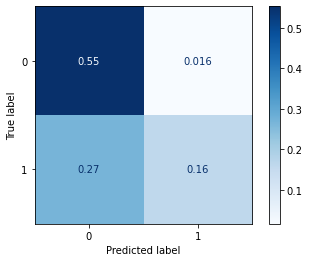

In [18]:
%%time
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-2], df.pred, test_size=0.2)

modelo_rf = RandomForestClassifier(criterion = 'entropy', max_depth=15)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)
with open('bot_rf.dat', 'wb') as file:
    pickle.dump(modelo_rf,file)

m = np.array(skm.confusion_matrix(y_test, y_pred, normalize='all'))
skm.plot_confusion_matrix(modelo_rf, X_test, y_test, normalize='all', cmap='Blues')

## Levantamos el modelo entrenado

In [25]:
with open('bot_rf.dat', 'rb') as file:
    modelo = pickle.load(file)

## Calculo de la esperanza matematica:

OBVIO HAY QUE HACER UN BACKTEST COMO LA GENTE, ES UNA SIMPLIFICACION ESTO

In [54]:
prob_pifiar = m[0,1]/(m[0,1]+m[1,1])
prob_acertar =  m[1,1]/(m[0,1]+m[1,1])
E = prob_acertar * res_medio_win + prob_pifiar * res_medio_loss
E

0.5058424933662734

In [ ]:
# Comision
# Derechos de mercado
# Spread